In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
cor = pd.read_csv('Corona virus.csv')
cor.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [3]:
cor.tail()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
429,430,NaN,Finland,1/30/2020 21:30,1.0,0.0,0.0
430,431,NaN,United Arab Emirates,1/30/2020 21:30,4.0,0.0,0.0
431,432,NaN,Philippines,1/30/2020 21:30,1.0,0.0,0.0
432,433,NaN,India,1/30/2020 21:30,1.0,0.0,0.0
433,434,NaN,Italy,1/30/2020 21:30,2.0,0.0,0.0


In [4]:
cor.shape

(434, 7)

In [5]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null object
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB


In [6]:
cor.describe()

,Sno,Confirmed,Deaths,Recovered
count,434.000000,434.000000,434.000000,434.000000
mean,217.500000,80.762673,1.847926,1.525346
std,125.429263,424.706068,15.302792,9.038054
min,1.000000,0.000000,0.000000,0.000000
25%,109.250000,2.000000,0.000000,0.000000
50%,217.500000,7.000000,0.000000,0.000000
75%,325.750000,36.000000,0.000000,0.000000
max,434.000000,5806.000000,204.000000,116.000000


As we can see Sno is of no use and so we will remove it from the dataset

In [7]:
cor = cor.drop(labels='Sno',axis=1)

In [8]:
cor

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0
5,Guangdong,China,1/22/2020 12:00,26.0,0.0,0.0
6,Guangxi,China,1/22/2020 12:00,2.0,0.0,0.0
7,Guizhou,China,1/22/2020 12:00,1.0,0.0,0.0
8,Hainan,China,1/22/2020 12:00,4.0,0.0,0.0
9,Hebei,China,1/22/2020 12:00,1.0,0.0,0.0


As we can see now the data looks more cleaner, we will proced further.

#### Total Countries Affected by Corona Virus.

In [9]:
total = cor['Country'].unique().tolist()
print(total)
print("Total Countries affected by corona virus",len(total))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy']
Total Countries affected by corona virus 27


Now checking the current Scenrio(Updated Data)

In [10]:
#Updating Last Update(string format to date and time format)
cor['Last Update'] = cor['Last Update'].apply(pd.to_datetime)

In [11]:
from datetime import date
data = cor[cor['Last Update'] > pd.Timestamp(date(2020,1,30))]
data.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


#### Country wise data 

We will group the data on the basis of country

In [12]:
cases = cor.groupby(['Country']).sum()
cases = cases[cases['Confirmed']>0]
cases = cases.reset_index()
cases.head()

,Country,Confirmed,Deaths,Recovered
0,Australia,34.0,0.0,2.0
1,Cambodia,4.0,0.0,0.0
2,Canada,10.0,0.0,0.0
3,China,549.0,0.0,0.0
4,Finland,2.0,0.0,0.0


Checking figures worldwide.

In [13]:
conf_case = cor['Confirmed'].sum()
deaths = cor['Deaths'].sum()
recovered = cor['Recovered'].sum()
sur = conf_case - (deaths + recovered)
print("Globally Confirmed Cases: ",conf_case)
print("Globally Death Cases: ",deaths)
print("Globally Recovered Cases: ",recovered)
print("Globally Under Survilance Cases: ",sur)

Globally Confirmed Cases:  35051.0
Globally Death Cases:  802.0
Globally Recovered Cases:  662.0
Globally Under Survilance Cases:  33587.0


Now let us have a geographical look for the confirmed cases of corona virus throughout the world

In [14]:
world_data = pd.DataFrame({
   'name':list(cases['Country']),
    'lat':[-25.27,12.57,56.13,39.91,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,1.35,35.91,7.87,23.7,15.87,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,116.36,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,103.82,127.77,80.77,120.96,100.99,-95.71,53.84,108.28],
   'Confirmed':list(cases['Confirmed']),
})

# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Confirmed'], world_data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

Death cases of corona virus throughout the world

In [15]:
cases1 = cases[cases['Deaths']>0]
cases1

,Country,Confirmed,Deaths,Recovered
12,Mainland China,33986.0,802.0,636.0


In [16]:
world_data1 = pd.DataFrame({
    'name':list(cases1['Country']),
    'lat':[35.86,],
    'lon':[113.54,],
    'Deaths':list(cases1['Deaths']),
})

world_map1 = folium.Map(location=[10, -20], zoom_start=1.0,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data1['lat'], world_data1['lon'], world_data1['Deaths'], world_data1['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Death Cases</strong>: ' + str(value) + '<br>'),
                        color='Red',
                        
                        fill_color='Red',
                        fill_opacity=0.9).add_to(world_map1)
world_map1

Recovered cases of corona virus throughout the world

In [17]:
cases2 = cases[cases['Recovered']>0]
cases2

,Country,Confirmed,Deaths,Recovered
0,Australia,34.0,0.0,2.0
10,Japan,44.0,0.0,5.0
12,Mainland China,33986.0,802.0,636.0
20,Thailand,75.0,0.0,19.0


In [18]:
world_data2 = pd.DataFrame({
    'name':list(cases2['Country']),
    'lat':[-25.27,36.2,35.86,15.87],
    'lon':[133.78,138.25,113.54,100.99],
    'Recovered':list(cases2['Recovered']),
})

world_map2 = folium.Map(location=[10, -20], zoom_start=1.0,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data2['lat'], world_data2['lon'], world_data2['Recovered'], world_data2['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Recovered Cases</strong>: ' + str(value) + '<br>'),
                        color='Red',
                        
                        fill_color='Red',
                        fill_opacity=0.9).add_to(world_map2)
world_map2

#### Lets look at different Province/State and countries.

In [19]:
df = cor.groupby(['Country','Province/State']).sum()
df = df[df['Confirmed'] > 0]
df


Confirmed  Deaths  Recovered
Country        Province/State                                
Australia      New South Wales        16.0     0.0        2.0
               Queensland              4.0     0.0        0.0
               Victoria                6.0     0.0        0.0
Canada         British Columbia        3.0     0.0        0.0
               Ontario                 7.0     0.0        0.0
China          Anhui                   1.0     0.0        0.0
               Beijing                14.0     0.0        0.0
               Chongqing               6.0     0.0        0.0
               Fujian                  1.0     0.0        0.0
               Guangdong              26.0     0.0        0.0
               Guangxi                 2.0     0.0        0.0
               Guizhou                 1.0     0.0        0.0
               Hainan                  4.0     0.0        0.0
               Hebei                   1.0     0.0        0.0
               Henan                   5.0     0.0        0.0
               Hubei                 444.0     0.0        0.0
               Hunan                   4.0     0.0        0.0
               Jiangsu                 1.0     0.0        0.0
               Jiangxi                 2.0     0.0        0.0
               Liaoning                2.0     0.0        0.0
               Macau                   1.0     0.0        0.0
               Ningxia                 1.0     0.0        0.0
               Shandong                2.0     0.0        0.0
               Shanghai                9.0     0.0        0.0
               Shanxi                  1.0     0.0        0.0
               Sichuan                 5.0     0.0        0.0
               Taiwan                  1.0     0.0        0.0
               Tianjin                 4.0     0.0        0.0
               Yunnan                  1.0     0.0        0.0
               Zhejiang               10.0     0.0        0.0
...                                    ...     ...        ...
Mainland China Guizhou                63.0     0.0        2.0
               Hainan                223.0     4.0        1.0
               Hebei                 262.0     8.0        0.0
               Heilongjiang          211.0     7.0        0.0
               Henan                1229.0     9.0        6.0
               Hubei               20128.0   760.0      478.0
               Hunan                1132.0     0.0        2.0
               Inner Mongolia         82.0     0.0        0.0
               Jiangsu               558.0     0.0        7.0
               Jiangxi               692.0     0.0       16.0
               Jilin                  57.0     0.0        2.0
               Liaoning              196.0     0.0        2.0
               Ningxia                63.0     0.0        1.0
               Qinghai                31.0     0.0        0.0
               Shaanxi               279.0     0.0        0.0
               Shandong              654.0     1.0        3.0
               Shanghai              504.0     6.0       24.0
               Shanxi                145.0     0.0        2.0
               Sichuan               653.0     2.0        2.0
               Tianjin               146.0     0.0        0.0
               Tibet                   2.0     0.0        0.0
               Xinjiang               62.0     0.0        0.0
               Yunnan                238.0     0.0        0.0
               Zhejiang             1736.0     0.0       20.0
Taiwan         Taiwan                 41.0     0.0        0.0
US             Arizona                 5.0     0.0        0.0
               California             10.0     0.0        0.0
               Chicago                 1.0     0.0        0.0
               Illinois                7.0     0.0        0.0
               Washington              9.0     0.0        0.0

[70 rows x 3 columns]

Let us have a look at  the country/countries that have dead cases

In [20]:
death_max = df.groupby('Country')['Deaths'].sum().sort_values(ascending = False)[:5]
death_max

Country
Mainland China    802.0
US                  0.0
Taiwan              0.0
Macau               0.0
Hong Kong           0.0
Name: Deaths, dtype: float64

So as we can see that all the death is caused in mainland China

There is no death caused in the whole world other than china

Now let us look at the country/countries that have recovered cases.

In [21]:
recovered_max = cases.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]
recovered_max

Country
Mainland China    636.0
Thailand           19.0
Japan               5.0
Australia           2.0
Cambodia            0.0
Name: Recovered, dtype: float64

Now taking a closer look at china's condition

In [22]:
china_df1 = cor[cor['Country']=='Mainland China']
china_df2 = cor[cor['Country']=='China']
china_df = pd.concat([china_df1, china_df2])

china_df = china_df.drop(columns=['Country','Last Update'],axis=1)

china_df = china_df.groupby('Province/State').sum()
china_df = china_df.reset_index()

china_df = china_df.drop([13], axis=0)
china_df = china_df.reset_index(drop=True)
china_df = china_df[china_df['Confirmed']>0]
china_df


,Province/State,Confirmed,Deaths,Recovered
0,Anhui,850.0,0.0,5.0
1,Beijing,594.0,4.0,20.0
2,Chongqing,877.0,0.0,3.0
3,Fujian,412.0,1.0,0.0
4,Gansu,123.0,0.0,0.0
5,Guangdong,1451.0,0.0,34.0
6,Guangxi,383.0,0.0,6.0
7,Guizhou,64.0,0.0,2.0
8,Hainan,227.0,4.0,1.0
9,Hebei,263.0,8.0,0.0


Now let us look at Recovered, Death and Confirmed Cases graphically except Hubei.

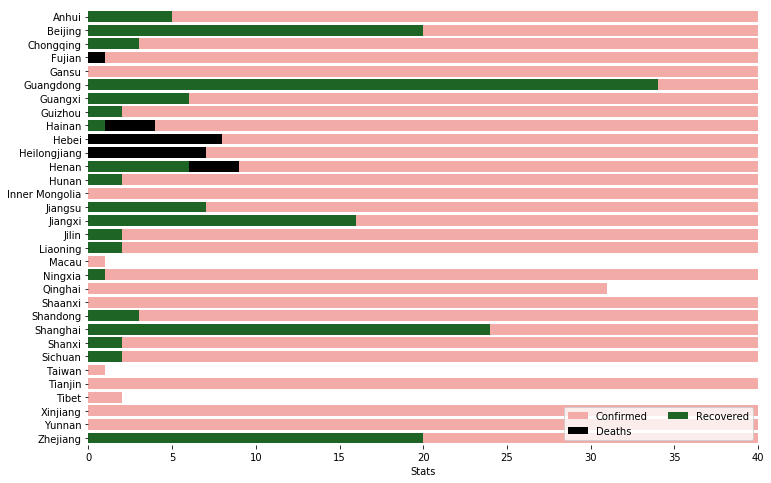

In [23]:
p , l = plt.subplots(figsize=(12,8)) 

sns.set_color_codes('pastel')
sns.barplot(x='Confirmed', y='Province/State', data=china_df, label='Confirmed', color='r')

sns.set_color_codes('muted')
sns.barplot(x='Deaths', y='Province/State', data=china_df, label='Deaths', color='Black')


sns.set_color_codes('dark')
sns.barplot(x='Recovered', y='Province/State', data=china_df, label='Recovered', color='g')

l.legend(ncol=2, loc="lower right", frameon=True)
l.set(xlim=(0, 40), ylabel="", xlabel="Stats")
sns.despine(left=True, bottom=True)

This was the breif analysis about the corona virus. I will soon add more insights to this.